### Question 1
#### Create a 2D array of dimensions 1000 x 1000, in which the values in each pixel are random-gaussian distributed about a mean of 10, with a sigma of 2, and then use matplotlib to display this image. Make sure (0,0) is in the lower lefthand corner.

[[12.44989874 12.52592477  7.28196094  8.16826505]
 [13.22671255  5.25799875 11.96349587  8.25729854]
 [ 7.94652491 13.30897665  9.33800403 11.16620899]]


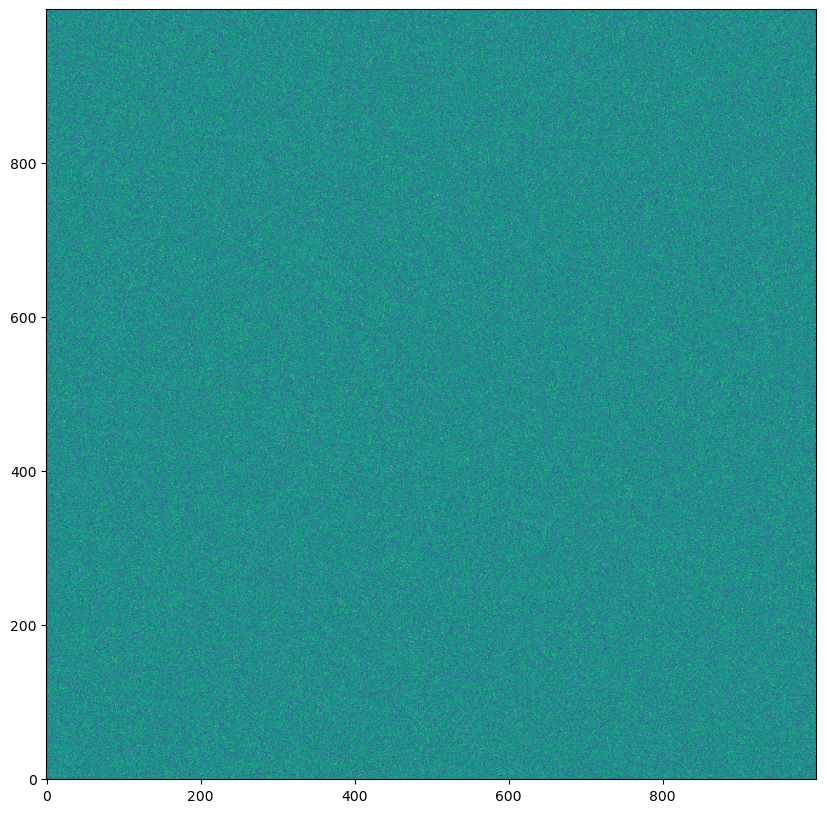

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
mu = 10
sigma = 2
Gauss = stats.norm(loc = mu, scale = sigma) # create normal distribution 
array = Gauss.rvs((1000,1000)) # create an array with the numbers that follow the normal distribution above
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(array,origin='lower')
array2 =  Gauss.rvs((3,4)) # (column, row)
print(array2)
                  

In [24]:
array

array([[10.07458731, 11.1027744 ,  8.03114279, ...,  9.52528167,
        12.17080158, 11.6149861 ],
       [ 8.31646014,  8.30551238,  9.09754066, ..., 11.89825745,
        12.30575111,  9.06778642],
       [12.6807468 , 11.9590901 , 10.47194861, ...,  9.87413898,
         9.14855663, 11.67309381],
       ...,
       [ 9.56308658, 10.82623344, 10.80718089, ...,  8.47936456,
         9.47492758,  9.41354663],
       [ 9.31218479, 11.22514853,  7.87689333, ..., 10.64873501,
        13.23974725,  9.42837468],
       [ 7.66297556,  9.88472111,  8.69958825, ...,  8.59341596,
        11.26911562,  9.63142372]])

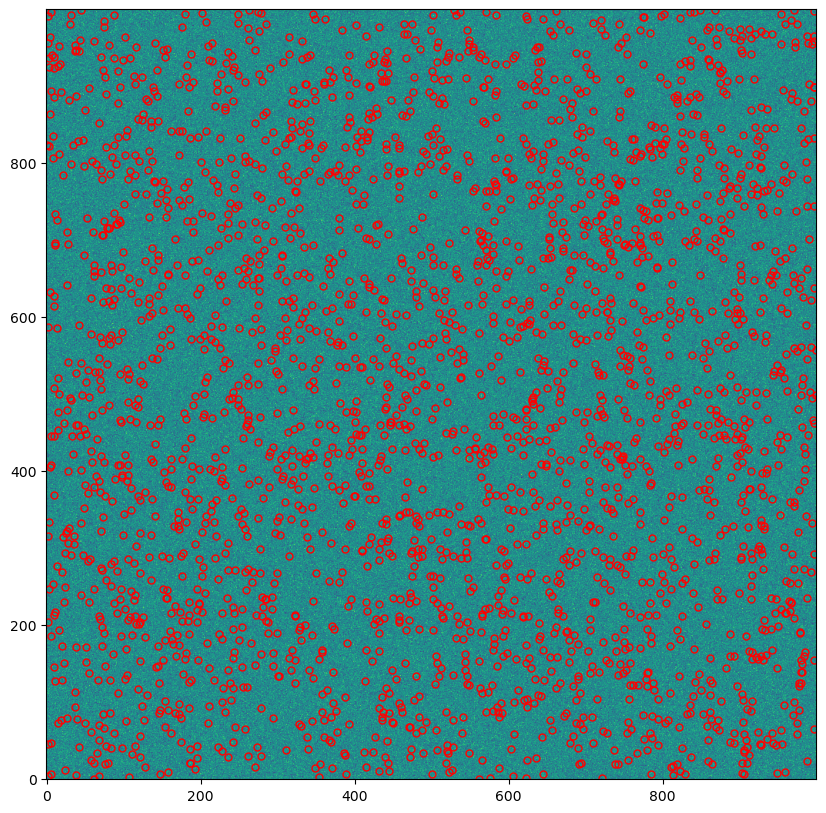

In [25]:
outliers = np.where((array>mu+3*sigma) | (array<mu-3*sigma)) # returns a tuple of arrays, outlier[0] = array of row indices of outlier data, outlier[1] = array of column indices of outliers
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(array,origin='lower') # 2D plot
ax.plot(outliers[0],outliers[1],'o',ms=5,color='None',mec='r')

In [26]:
outliers

(array([  0,   1,   1, ..., 997, 999, 999], dtype=int64),
 array([823,   4, 204, ..., 965, 499, 557], dtype=int64))

### Question 3
#### When dealing with astronomical data, it is sometimes advisable to not include outliers in a calculation being performed on a set of data (in this example, an image). We know, of course, that the data we’re plotting ARE coming from a gaussian distribution, so there’s no reason to exclude, e.g., 3-sigma outliers, but for this example, let’s assume we want to.

#### Create a numpy masked array in which all pixels that are > 3σ from the image mean are masked. Then, calculate the mean and sigma of the new masked array.

In [27]:
clipped_array = np.ma.masked_where((array>mu+3*sigma) | (array<mu-3*sigma),array)
print(f'Clipped Mean: {np.mean(clipped_array):.3f} | Clipped Sigma: {np.std(clipped_array):.3f}')

Clipped Mean: 9.999 | Clipped Sigma: 1.972


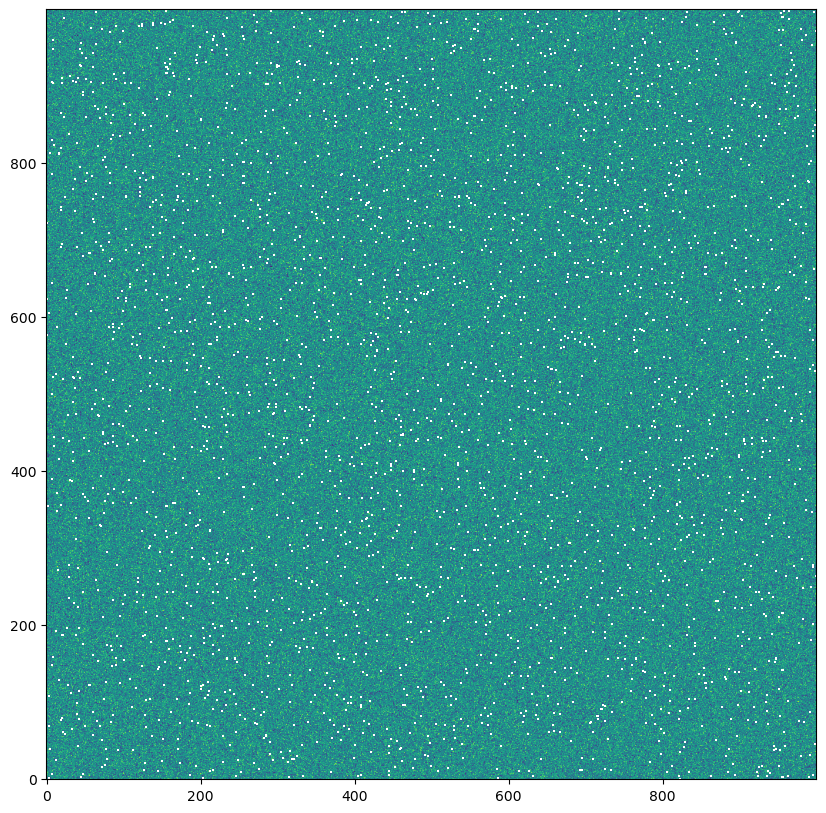

In [28]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(clipped_array,origin='lower')

### Q4
#### Using Array indexing, re-plot the same array from above, but zoom in on the inner 20% of the image, such that the full width is 20% of the total. Note: try not to hard code your indexing. You should be able to flexibly change the percentage. For this one, use a white-to-black color map.

In [29]:
np.shape(array)

(1000, 1000)

In [30]:
array.shape


(1000, 1000)

In [31]:
center = int(array.shape[0]/2)
percent = int(0.2*array.shape[0]/2)
print(center)
print(percent)

500
100


(200, 200)


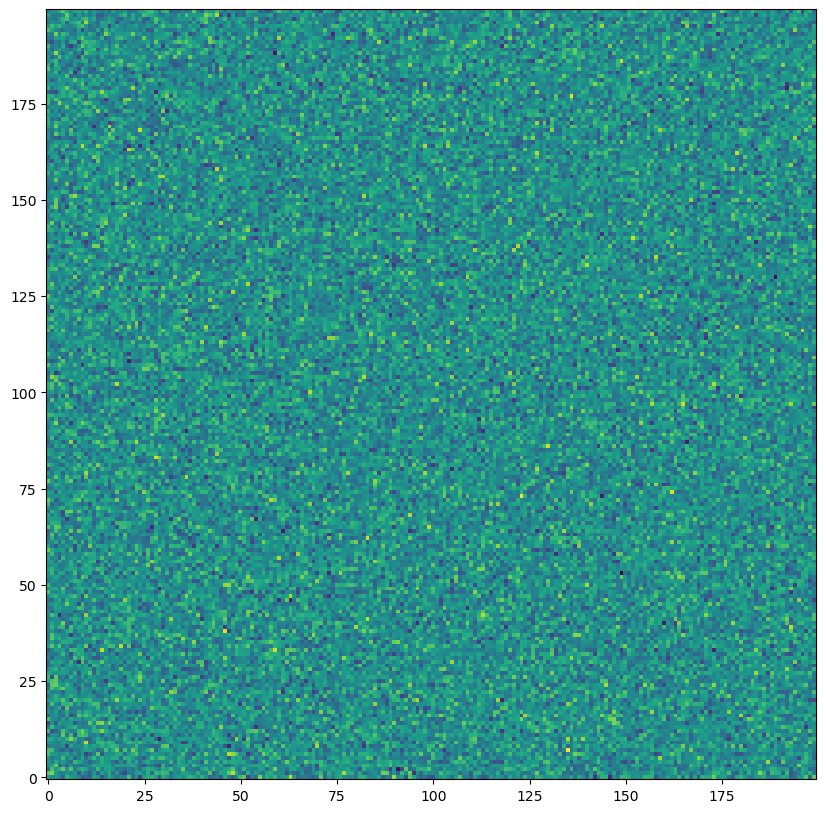

In [32]:
cropped_array = array[center-percent:center+percent,center-percent:center+percent]
print(np.shape(cropped_array))
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(cropped_array,origin='lower')

In [33]:
a = np.array([1,5,10,20])
b = np.array([1,2,4,16])
print(np.shape(a))
print(b)

(4,)
[ 1  2  4 16]


In [34]:
row_vector = a[np.newaxis,:]
row_vector

array([[ 1,  5, 10, 20]])

In [35]:
np.shape(row_vector)

(1, 4)

In [36]:
column_vector = a[:,np.newaxis]
column_vector


array([[ 1],
       [ 5],
       [10],
       [20]])

In [37]:
a = np.random.rand(5,1)
b = np.random.rand(1,6)
c = np.random.rand(6,)
f = np.random.rand(6,)
d = np.random.rand()


In [38]:
k = f*c
print(np.shape(k))


(6,)


### Q5

In [39]:
#broadcasting, basically means matrix multiplication
a = np.array([1,5,10,20])
b = np.array([1,2,4,16])
print(np.shape(a))
print(np.shape(b))

(4,)
(4,)


In [40]:
c = a[:,np.newaxis]
output = c*b
print(output)
summation = np.sum(output)
print(summation)

[[  1   2   4  16]
 [  5  10  20  80]
 [ 10  20  40 160]
 [ 20  40  80 320]]
828


### Question 6¶
### Often in astronomy we need to work with grids of values. For example, let’s say we have a model that describes some data, and the model has 2 parameters, a and b. We might choose different combinations of a and b, and determine a metric for how well models of such combinations fit our data (e.g., χ2).

### We may then want to plot this χ2 value for each point on our grid – that is, at each grid position corresponding to some ai and bj.

### Below, I provide a function, chi2, which returns a single number given some singular inputs a and b.

### Create some arrays of a and b to test that range between 1 and 25, and have 10 entries evenly spaced between those values. Then, loop over them and find the χ2 using my function.

In [62]:
def chi2(a,b):
    return ((15-a)**2+(12-b)**2)**0.2

a = np.linspace(1,25,10)
b = np.linspace(1,25,10)
chi2_values = []
for i in a:
    for j in b:
        chi2_values.append(chi2(i,j))
chi2_values  = np.array(chi2_values)
chi2_values = chi2_values.reshape((10,10))
print(np.shape(chi2_values))

        

(10, 10)


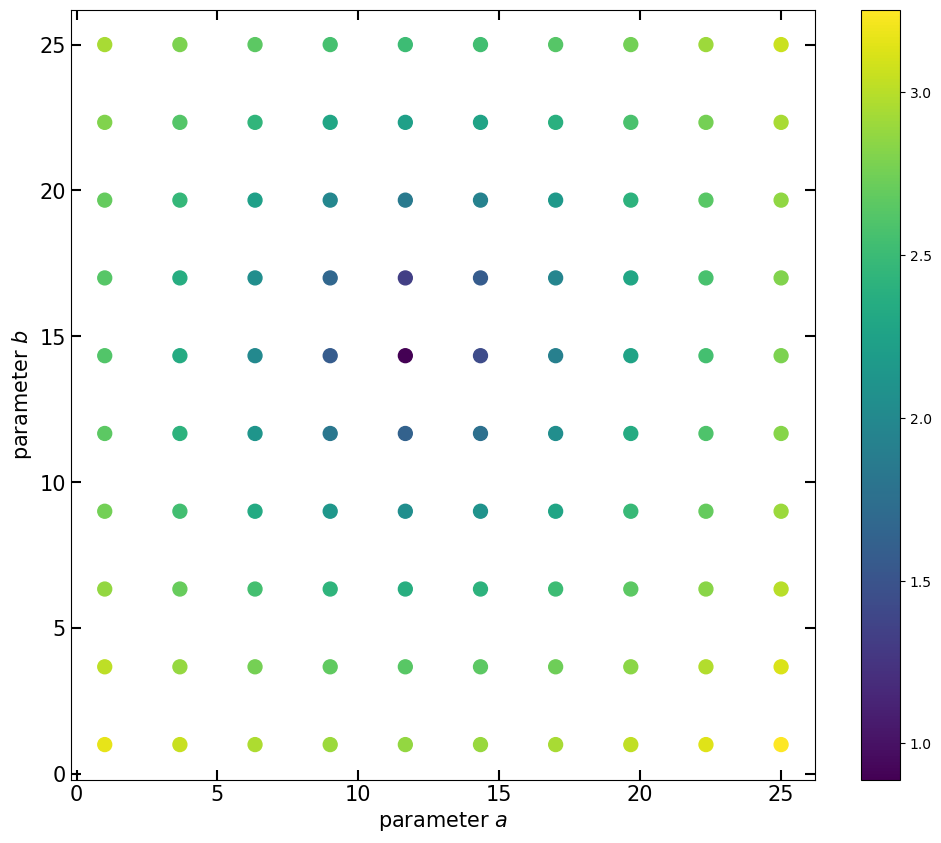

In [63]:
xx,yy = np.meshgrid(a,b)
fig,ax = plt.subplots(figsize=(12,10))

#update ticks, #update the numbers along axis to fontsize 15 = labelsize=15
ax.tick_params(direction='in',right=True,top=True,length=7,width=1.5,labelsize=15)

#label x,y axes with font size > 13
plt.xlabel(r'parameter $a$',fontsize = 15)
plt.ylabel(r'parameter $b$',fontsize = 15)

im = ax.scatter(xx,yy,c=chi2_values,marker='o',s=100)
plt.colorbar(im)
#update colorbar
cbar.set_label(r'model $\chi^2$',fontsize=14)

### Question 8
#### Some quick list comprehensions! For any unfamilar, comprehensions are pythonic statements that allow you to compress a for-loop (generally) into a single line, and usually runs faster than a full loop (but not by a ton).

#### Take the for-loop below and write it as a list comprehension.

In [64]:
visited_cities = ['San Diego', 'Boston', 'New York City','Atlanta']
all_cities = ['San Diego', 'Denver', 'Boston', 'Portland', 'New York City', 'San Francisco', 'Atlanta']

not_visited = []
for city in all_cities:
    if city not in visited_cities:
        not_visited.append(city)
        
print(not_visited)

['Denver', 'Portland', 'San Francisco']


In [65]:
not_visited_2 = [city for city in all_cities if city not in visited_cities]

In [66]:
print(not_visited_2)


['Denver', 'Portland', 'San Francisco']


In [77]:
import numpy as np
arr = np.random.randint(1,30,size=(15,),dtype=int)
arr

array([12, 27,  9, 18,  3,  5, 22, 20,  5,  6,  7, 13, 12,  7, 14])

In [78]:
odd_array = [i**2 for i in arr if i%2 != 0]
odd_array

[729, 81, 9, 25, 25, 49, 169, 49]

In [93]:
first_names = ['Bob','Samantha','John','Renee']
last_names = ['Smith','Bee','Oliver','Carpenter']

# Your Code
full_names = [i+' '+j for i,j in zip(first_names,last_names)]
full_names

['Bob Smith', 'Samantha Bee', 'John Oliver', 'Renee Carpenter']

In [108]:
all_names = ['sMitH,BoB   ', '  bee,samanthA',' oLIVER,JOHN ','  caRPENTer,reneE  ']

# Your Code 
new_names = []
for i in all_names:
    i = i.replace(","," ").strip().lower().split()
    i = i[::-1]
    i = ' '.join(i)
    i = i.title()
    new_names.append(i)
new_names

['Bob Smith', 'Samantha Bee', 'John Oliver', 'Renee Carpenter']

In [110]:
# list comprehension
new_names = [(' '.join(i.replace(","," ").strip().lower().split()[::-1])).title() for i in all_names]
new_names

['Bob Smith', 'Samantha Bee', 'John Oliver', 'Renee Carpenter']

In [122]:
XX = np.array([1,2,3,4,5,6,7,8,9])
YY = np.array([5,6,7,8,9,10,11,12,13])
ZZ = np.array([10,11,12,13,14,15,16,17,18])

# Your Code




SyntaxError: invalid syntax (4035994035.py, line 7)

In [124]:
np.column_stack((XX,YY,ZZ))

array([[ 1,  5, 10],
       [ 2,  6, 11],
       [ 3,  7, 12],
       [ 4,  8, 13],
       [ 5,  9, 14],
       [ 6, 10, 15],
       [ 7, 11, 16],
       [ 8, 12, 17],
       [ 9, 13, 18]])

In [125]:
import astropy.units as u


In [127]:
star_temp = 5000*u.K
star_temp

<Quantity 5000. K>

In [128]:
star_temp.to(u.K).value

5000.0